# Telecom Customer Churn Prediction Using Machine Learning


#### Project Description :

Churn (loss of customers to competition) is a problem for companies because it is more expensive to
acquire a new customer than to keep your existing one from leaving. This problem statement is targeted
at enabling churn reduction using analytics concepts. We have to Churn Rate on the basis of their usage
data.

#### Loading Libraries & Data

In [1]:
# Importing Libraries     
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# %matplotlib inline

In [2]:
#Loading Dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#### Exploring Data

In [3]:
train.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
#Checking info of data as data types and rows n cols
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [5]:
train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
#All continous variables in cname
cname = train.columns[(train.dtypes=="float64")|(train.dtypes=="int64")].tolist()
print(cname)

#All categorical var in cat_names and removing target var
cat_names = train.select_dtypes(exclude=np.number).columns.tolist()
cat_names.remove('churn')
cat_names

['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


['state', 'area_code', 'international_plan', 'voice_mail_plan']

In [7]:
train['international_plan'].value_counts()

no     3854
yes     396
Name: international_plan, dtype: int64

#### Checking Missing Value in Data

In [8]:
#Checking missing values in train dataset
print(train.isnull().sum())  

#no missing value present in the train data

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64


In [9]:
#Checking missing values in test data set
print(test.isnull().sum())  

#no missing value present in the test data

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64


 No missing value found in both train and test data set

#### Visualizing data

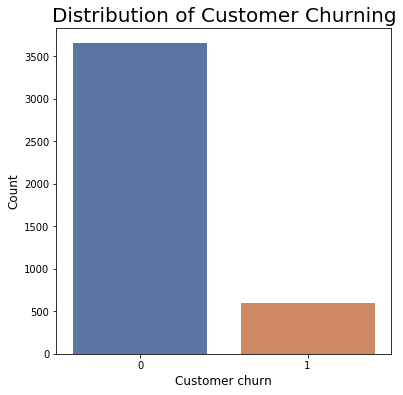

In [62]:
#Target Variable data distribution
plt.figure(figsize=(6,6))
sns.countplot(x = train.churn,palette='deep')
plt.xlabel('Customer churn', fontsize= 12)
plt.ylabel('Count', fontsize= 12)
plt.title("Distribution of Customer Churning",fontsize= 20)
plt.savefig("Distribution of Customer Churning on train data.png")
plt.show()

###### It is clear that we have a Class Imbalance problem

In [11]:
#Groupby --> size to represent ---> unstack the category
#train.groupby(["state", "Churn"]).size().unstack(level=-1).head()

#Relationational bar graph for checking data distribution with respect to target variable
def diff_bar(x,y):
    
    train.groupby([x,y]).size().unstack(level=-1).plot(kind='bar', figsize=(35,10))
    plt.xlabel(x,fontsize= 25)
    plt.ylabel('count',fontsize= 25)
    plt.legend(loc=0,fontsize= 25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("{X} Vs {Y}".format(X=x,Y=y),fontsize = 40)
    plt.show()

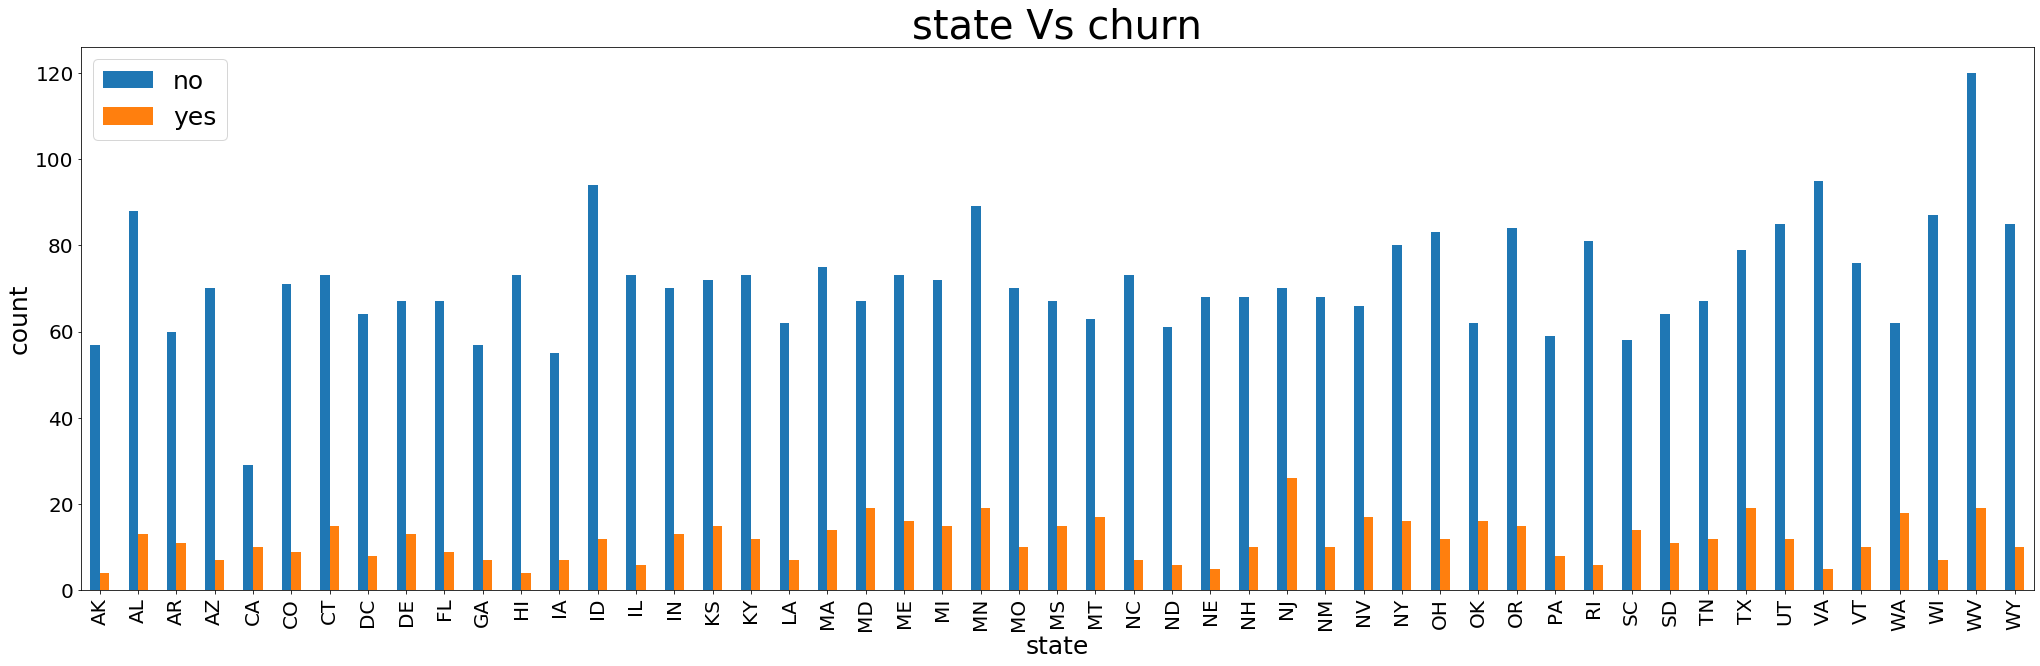

In [12]:
#State Wise Churning of customer
diff_bar('state','churn')

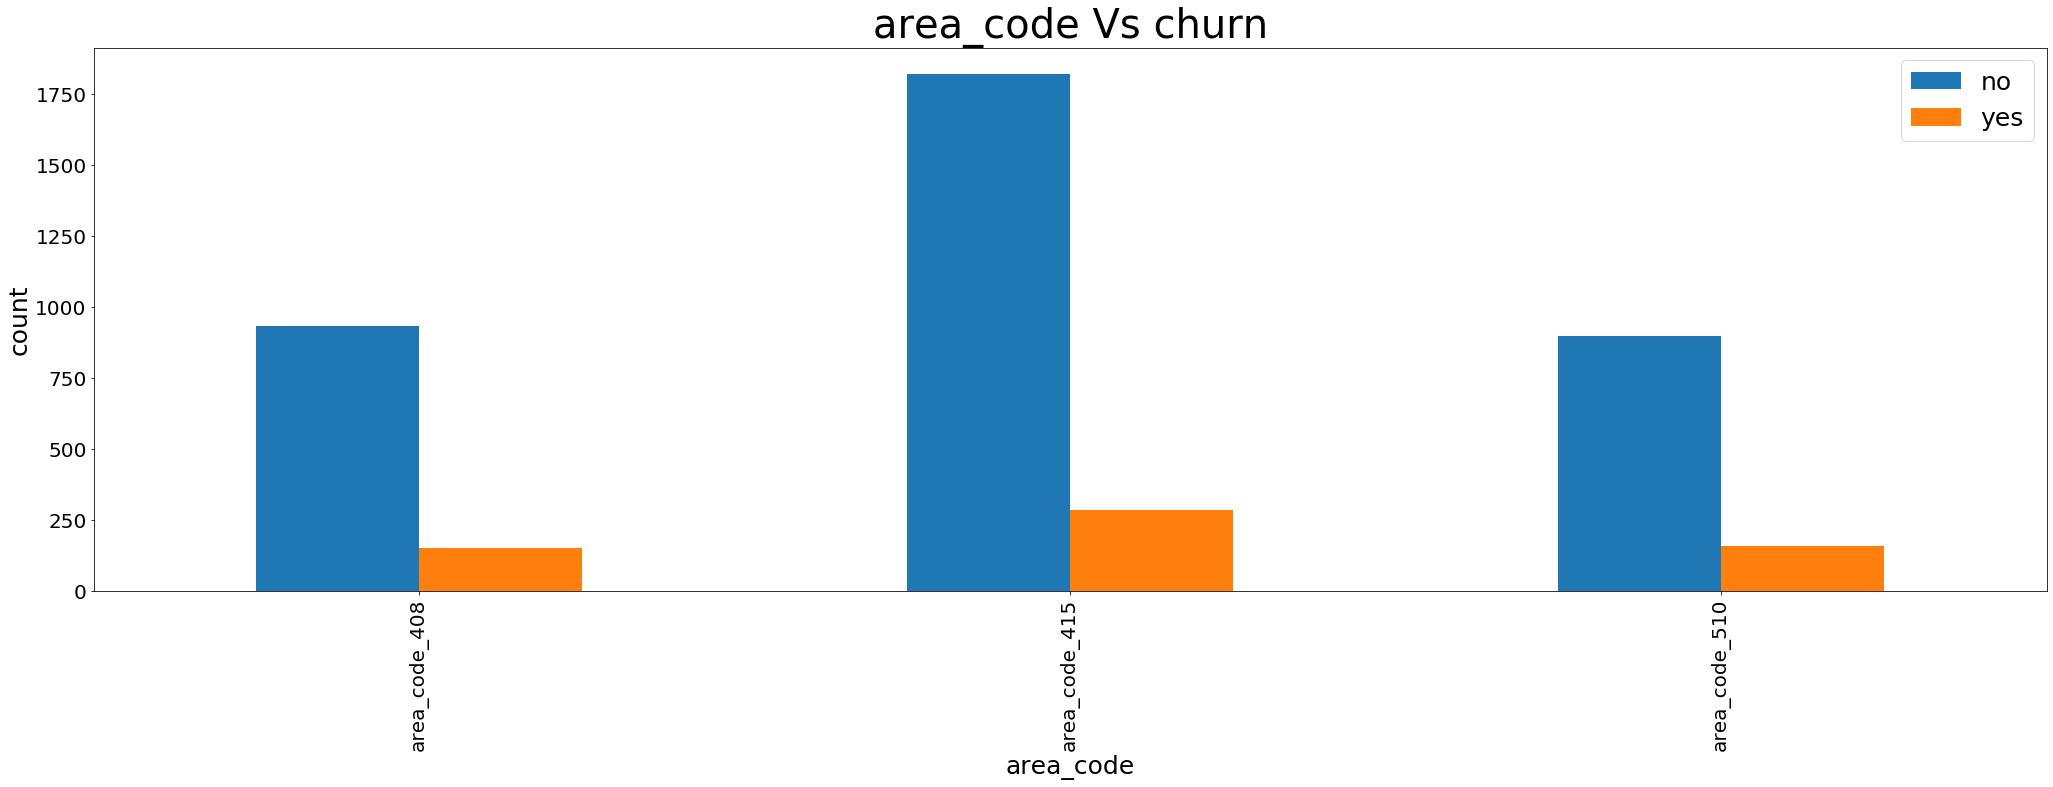

In [13]:
#area_code Wise Churning of customer
diff_bar('area_code','churn')

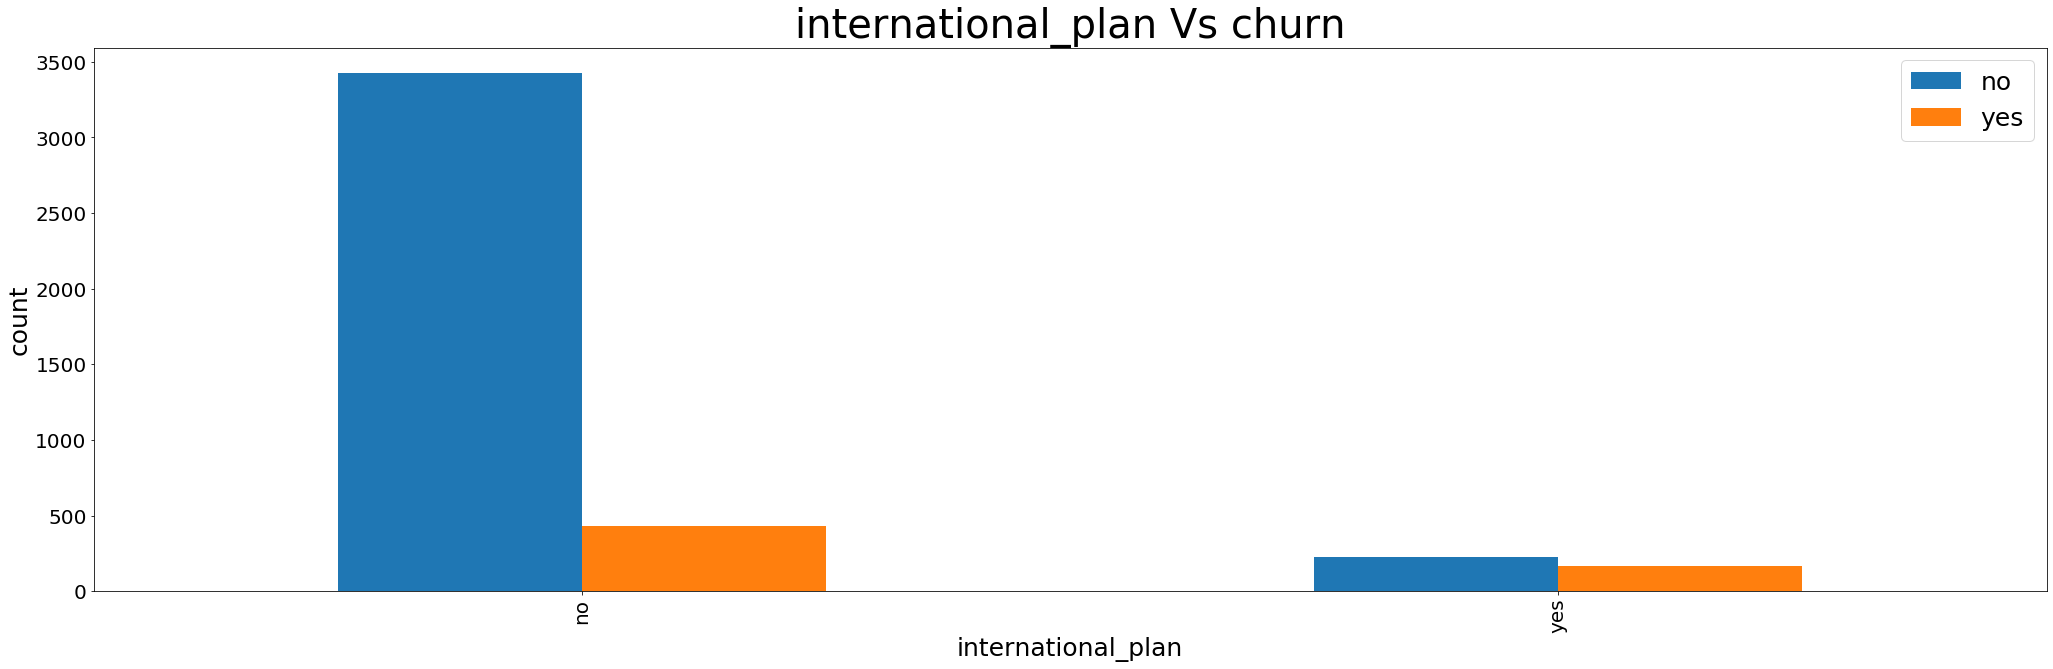

In [14]:
#International_Plan Wise Churning of customer
diff_bar('international_plan','churn')

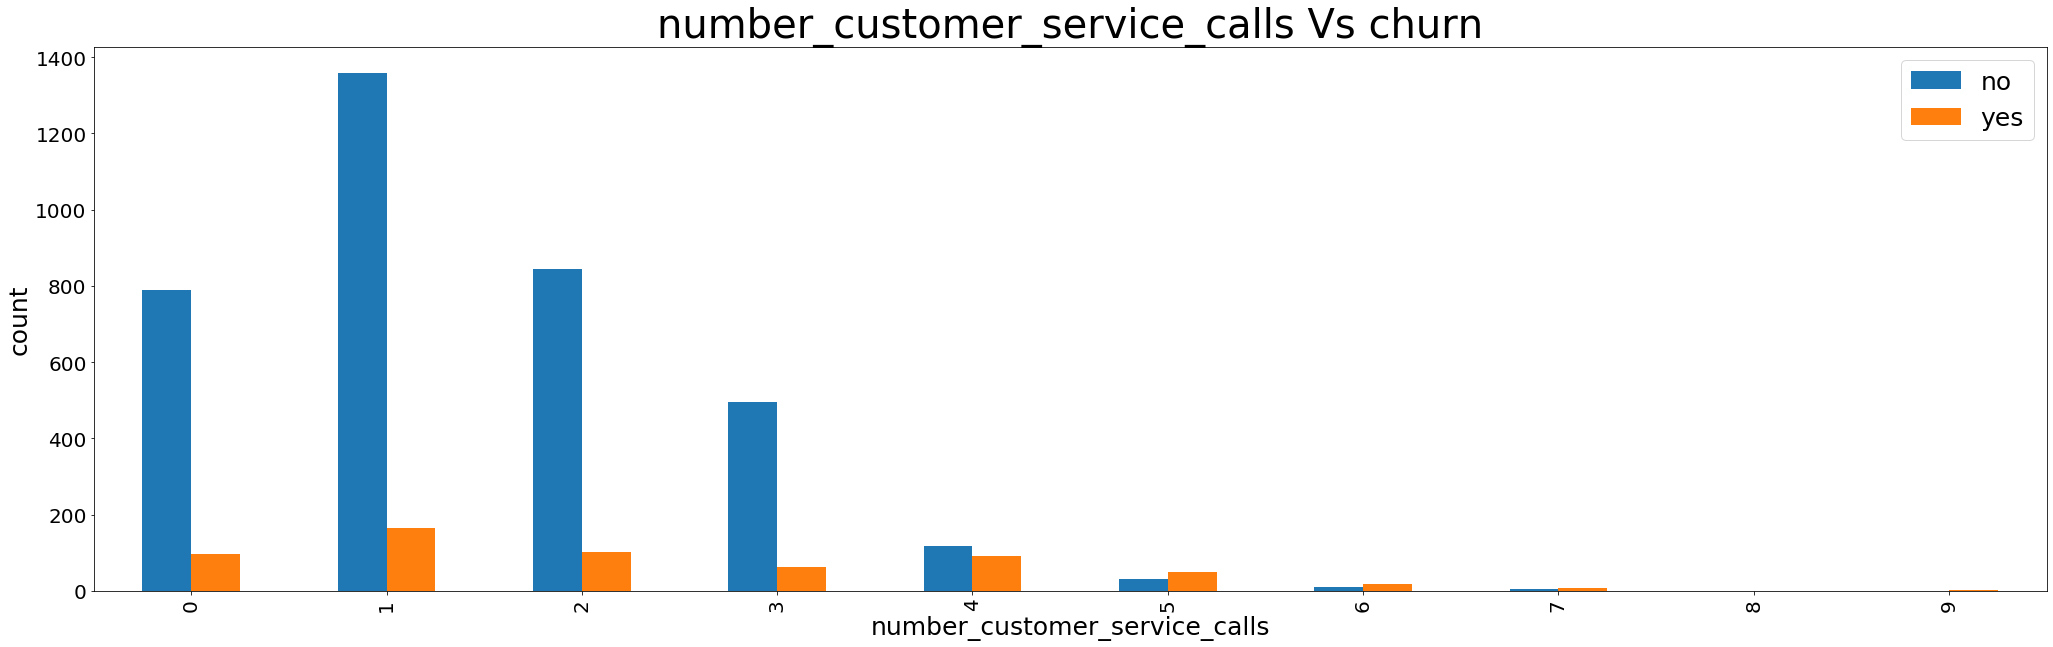

In [15]:
#Number of Customer_Service Call Wise Churning of customer
diff_bar('number_customer_service_calls','churn')

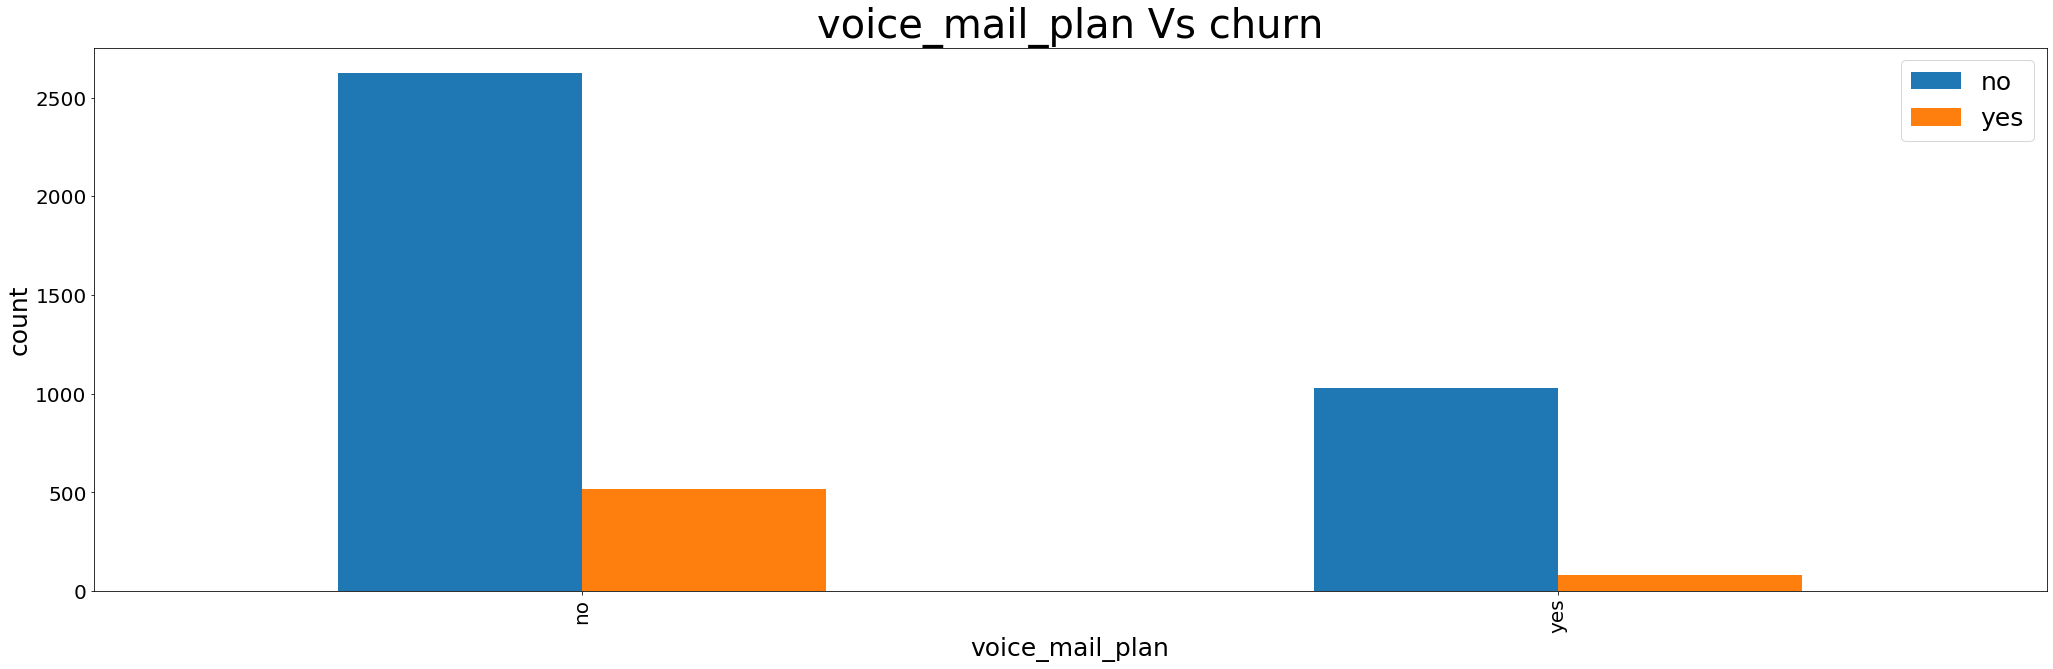

In [16]:
#No. of Customer Churning and had a Voice mail plan
diff_bar('voice_mail_plan','churn')

In [17]:
#Scatter plot function
def diff_scattr(x,y):
    fig = plt.figure()
    fig = sns.lmplot(x,y, data=train,fit_reg=False)
    plt.xlabel(x,fontsize= 14)
    plt.ylabel(y,fontsize= 14)
    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=10)
    plt.title("{X} and {Y} Scatter Plot".format(X=x,Y=y),fontsize = 16)
    plt.show()

<Figure size 432x288 with 0 Axes>

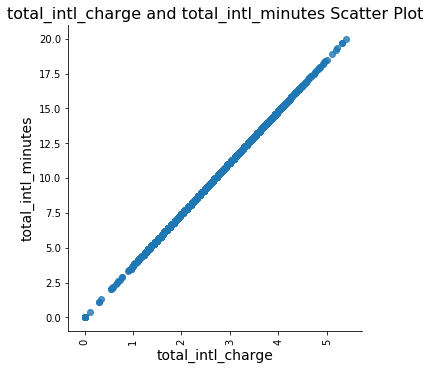

In [18]:
#Total intl charge and Total intl Minute
diff_scattr('total_intl_charge','total_intl_minutes')

<Figure size 432x288 with 0 Axes>

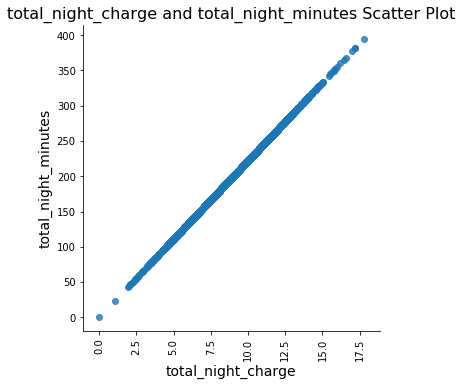

In [19]:
## Total night charge and Total night Minute
diff_scattr('total_night_charge','total_night_minutes')

<Figure size 432x288 with 0 Axes>

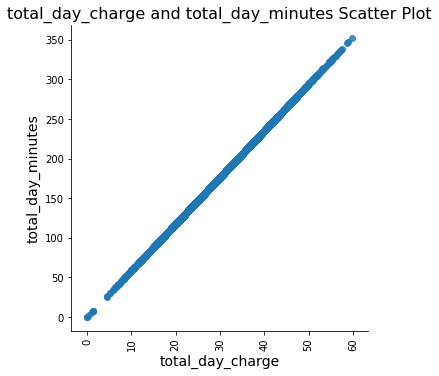

In [20]:
#Total day charge and Total Day Minute
diff_scattr('total_day_charge','total_day_minutes')

#### Changing Categorical column values to numeric codes

In [21]:
#function for converting categoric to num codes
def cat_to_num(df):
    for i in range(0, df.shape[1]):
        #print(i)
        if(df.iloc[:,i].dtypes == 'object'):
            df.iloc[:,i] = pd.Categorical(df.iloc[:,i])
            df.iloc[:,i] = df.iloc[:,i].cat.codes
            df.iloc[:,i] = df.iloc[:,i].astype('object')
    return df

In [22]:
train = cat_to_num(train)
test = cat_to_num(test)

#### Anomaly Detections or Outlier Analysis

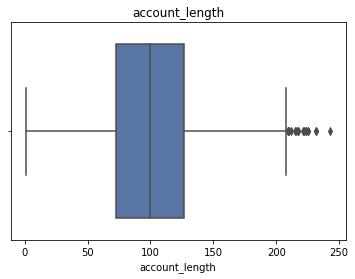

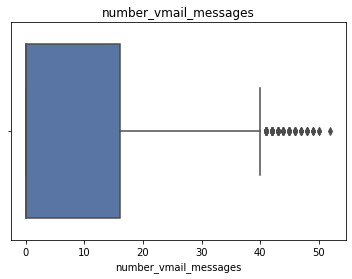

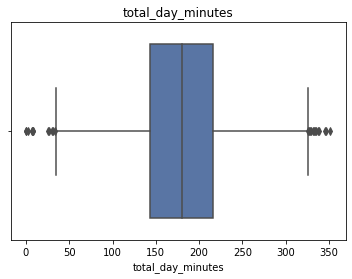

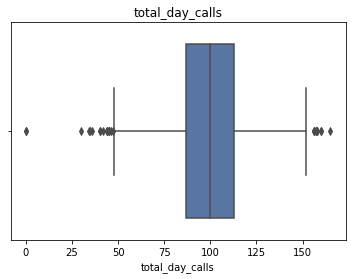

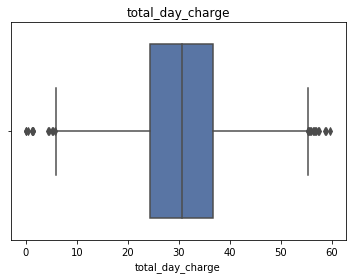

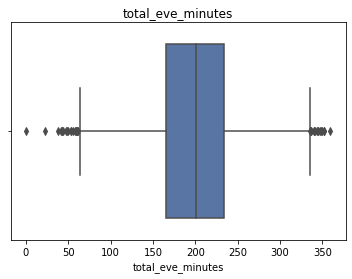

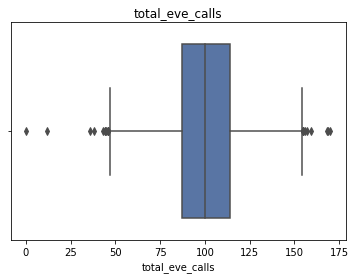

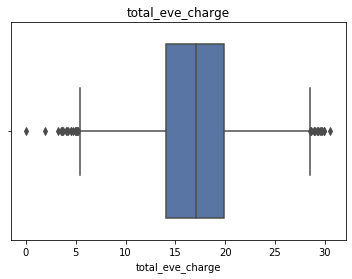

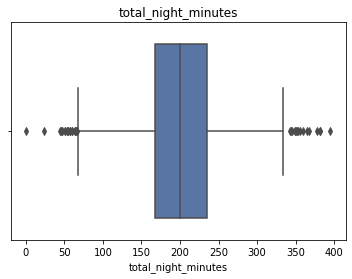

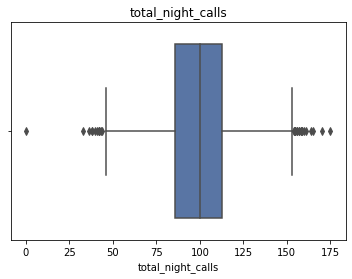

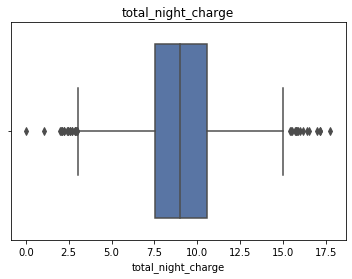

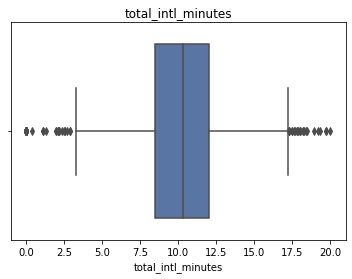

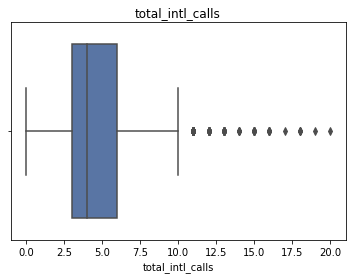

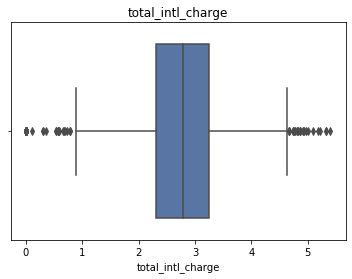

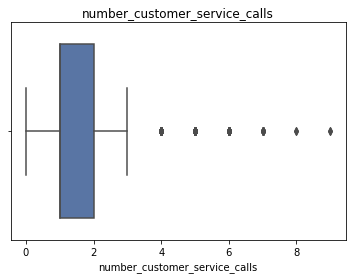

In [23]:
# #Plotting Box Plot
for i in cname:
    plt.figure()
    plt.clf() #clearing the figure
    sns.boxplot(train[i],palette="deep")
    plt.title(i)
    plt.show()

In [24]:
#Treating Out Liers and Converting them to nan
for i in cname:
    #print(i)
    q75, q25 = np.percentile(train.loc[:,i], [75 ,25])
    iqr = q75 - q25
    minn = q25 - (iqr*1.5)
    maxx = q75 + (iqr*1.5)
#Converting to nan
    train.loc[train.loc[:,i] < minn,i] = np.nan
    train.loc[train.loc[:,i] > maxx,i] = np.nan
    print('{var} -----> {X}   Missing'.format(var = i, X = (train.loc[:,i].isnull().sum())))

account_length -----> 20   Missing
number_vmail_messages -----> 86   Missing
total_day_minutes -----> 25   Missing
total_day_calls -----> 28   Missing
total_day_charge -----> 26   Missing
total_eve_minutes -----> 34   Missing
total_eve_calls -----> 24   Missing
total_eve_charge -----> 34   Missing
total_night_minutes -----> 37   Missing
total_night_calls -----> 33   Missing
total_night_charge -----> 37   Missing
total_intl_minutes -----> 62   Missing
total_intl_calls -----> 100   Missing
total_intl_charge -----> 62   Missing
number_customer_service_calls -----> 335   Missing


In [25]:
# Imputing with mean because fancyimpute not working
for i in cname:
    print (i)
    train = train.apply(lambda x:x.fillna(train.loc[:,i].mean()))   
    

account_length
number_vmail_messages
total_day_minutes
total_day_calls
total_day_charge
total_eve_minutes
total_eve_calls
total_eve_charge
total_night_minutes
total_night_calls
total_night_charge
total_intl_minutes
total_intl_calls
total_intl_charge
number_customer_service_calls


In [26]:
train.head(1)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,35,107.0,1,0,1,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.7,1.0,0


### Feature Selections

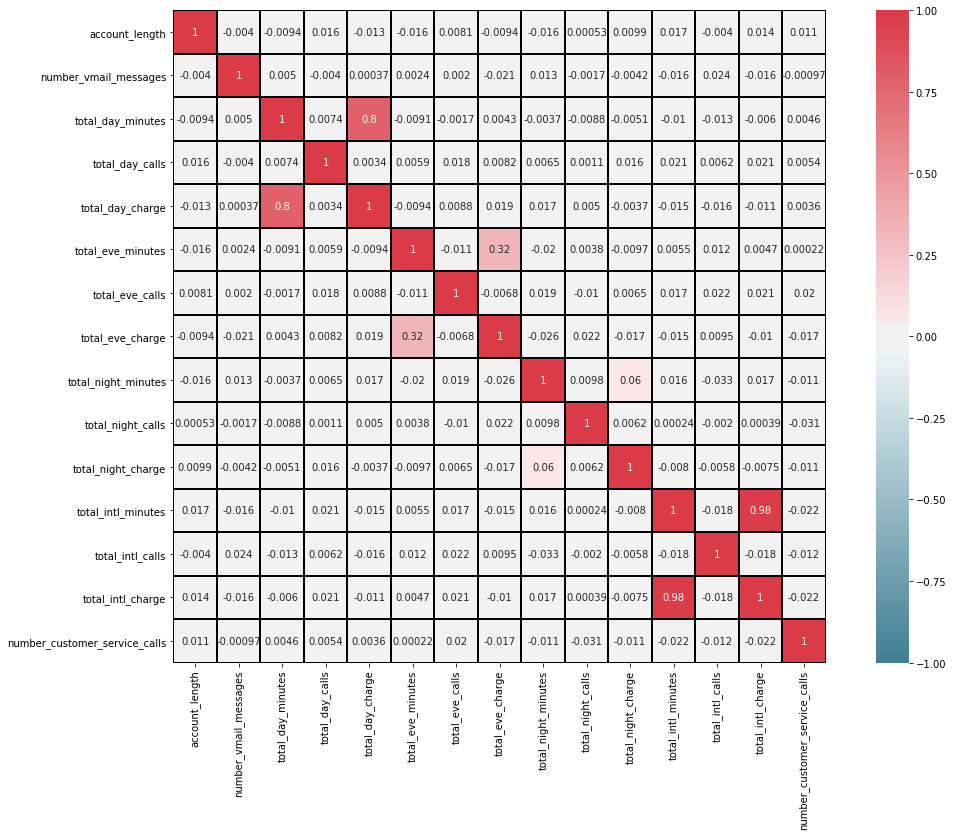

In [27]:
#Setting up the pane or matrix size
f, ax = plt.subplots(figsize=(18,12))  #Width,height

#Generating Corelation Matrix
corr = train[cname].corr()

#Plot using Seaborn library
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),\
            square=True, ax=ax,annot=True,linewidths=1 , linecolor= 'black',vmin = -1, vmax = 1)

plt.show()

#### Chi-Square for Categorical variables

In [28]:
#checking Relation b/w categorical variables with respect to target var
from scipy.stats import chi2_contingency
for i in cat_names:
    print(i)
    #As we know imput to chi square is always a contiguency table so we generating it using crostab function present in pd
    chi2, p, dof, ex =chi2_contingency(pd.crosstab(train['churn'],train[i]))
    #as above pd.crosstab(dependent variable , independent variable)
    print(p)
    
#chi2 = Actual chi square test value
#p = pvalue
#dof = degree of freedom
#ex = expected value

# As if p value is less than 0.05 then we will reject null hypothesis
#Null = both the variables are independent
#Alternate = Both the variables are not independent

state
0.0011690284839826976
area_code
0.5442605842955197
international_plan
1.9831895448817517e-63
voice_mail_plan
1.139803854851859e-13


In [29]:
#Removing correlated variable & the variable which doesn't contain any meaning full info
rmev = ['state','total_day_charge','total_eve_charge','total_night_charge','total_intl_charge']
train = train.drop(rmev,axis=1)
test = test.drop(rmev,axis=1)

In [30]:
#Updating values _after removal of var
cname = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_eve_minutes',
         'total_eve_calls', 'total_night_minutes', 'total_night_calls', 'total_intl_minutes', 'total_intl_calls',
         'number_customer_service_calls']

#All categorical var and removing target var
cat_names = ['area_code', 'international_plan', 'voice_mail_plan']

print('cname :- {}'.format(cname))
print()
print('cat_name :- {}'.format(cat_names))

cname :- ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_eve_minutes', 'total_eve_calls', 'total_night_minutes', 'total_night_calls', 'total_intl_minutes', 'total_intl_calls', 'number_customer_service_calls']

cat_name :- ['area_code', 'international_plan', 'voice_mail_plan']


###  Feature Scaling

##### Checking Distribution of data

In [31]:
#Histogram breaks down by target variable
def plot_hist_y(x,y):
    plt.hist(list(x[y == 1]),color='green',label='True',bins='auto')
    plt.hist(list(x[y == 0]),color='grey', alpha = 0.7, label='False',bins='auto')
    plt.title("Histogram of {var} breakdown by {Y}".format(var = x.name,Y=y.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc="upper right")
    plt.savefig("Histogram of {var} breakdown by {Y}.png".format(var = x.name,Y=y.name))
    plt.show()

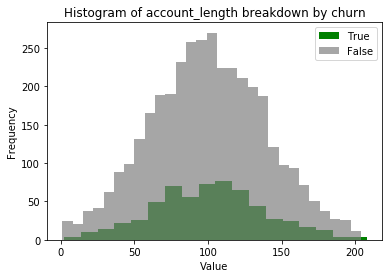

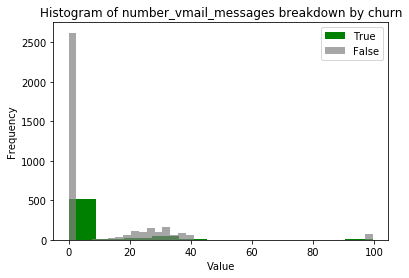

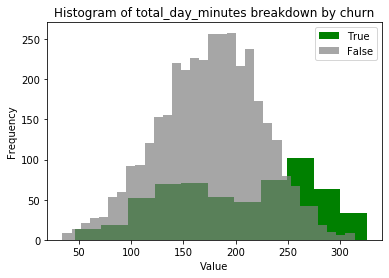

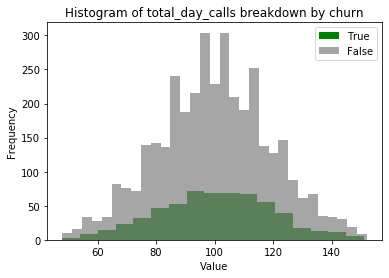

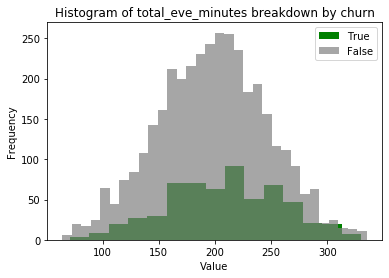

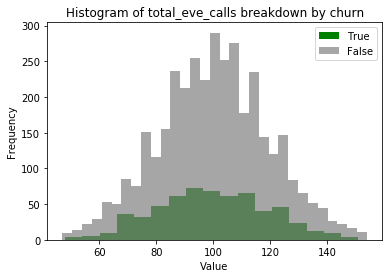

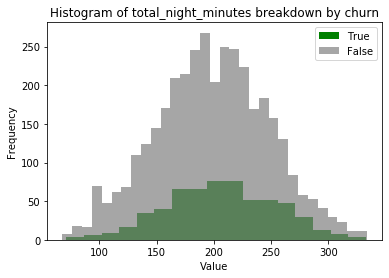

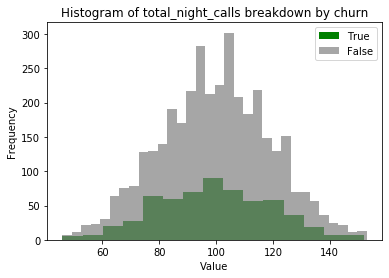

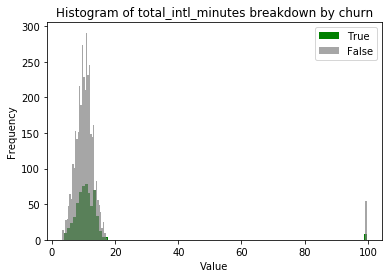

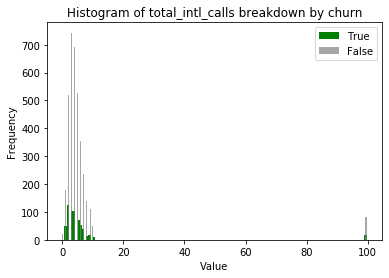

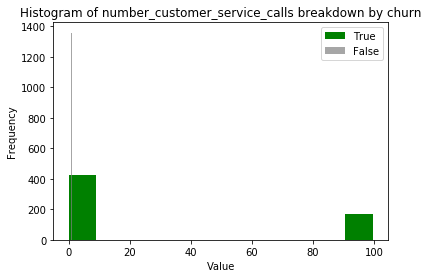

In [32]:
for i in cname:
    #print(i)
    plot_hist_y(train[i],train.churn)

###### As most of the data is uniformally distributed , Hence Using data Standardization/Z-Score here

### Scalling

In [33]:
#Applying standarization as most of the variables are normalized distributed
def scale_standard(df):
    for i in cname:
        #print(i)
        df[i] = (df[i] - df[i].mean())/df[i].std()
    return df

In [34]:
#Standardizing Scale
train = scale_standard(train)
test = scale_standard(test)

In [35]:
train.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,0.188781,1,0,1,0.957489,-0.343287,1.196626,-0.082098,0.144096,1.111257,0.167856,0.190728,-0.237339,-0.303638,0
1,0.961393,1,0,0,-0.486650,1.201608,0.727648,-1.590678,0.505735,-0.756486,0.219525,0.054536,-0.100493,-0.341336,0
2,-0.403554,0,1,0,-0.486650,2.259238,-1.513024,-2.027826,-0.630845,-0.058626,-0.555509,-0.453915,0.036353,-0.265940,0
3,-0.635337,1,1,0,-0.486650,-0.246967,0.675540,-1.040442,1.125687,-0.262084,1.097897,-0.136133,-0.237339,-0.228242,0
4,0.549333,2,0,1,0.846402,0.725675,-0.627177,-2.027826,0.402409,0.260803,0.942890,-0.372199,0.036353,-0.228242,0


### Sampling Data For Train and Test

#### Stratified Sampling

In [36]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
#Using train test split functionality for creating sampling
X = train.iloc[:,:14]
y = train.iloc[:,14]
y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [37]:
(X_train.shape),(y_train.shape)

((2847, 14), (2847,))

### Prediction function

In [38]:
#Predicting & Stats Function

def pred(model_object,predictors,compare):
    """1.model_object = model name
       2.predictors = data to be predicted
       3.compare = y_train"""
    predicted = model_object.predict(predictors)
    # Determine the false positive and true positive rates
    cm = pd.crosstab(compare,predicted)
    TN = cm.iloc[0,0]
    FN = cm.iloc[1,0]
    TP = cm.iloc[1,1]
    FP = cm.iloc[0,1]
    print("CONFUSION MATRIX ------->> ")
    print(cm)
    print()
    
    ##check accuracy of model
    print('Classification paradox :------->>')
    print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
    print()
    print('Specificity //  True Negative Rate :- ',round((TN*100)/(TN+FP),2))
    print()
    print('Sensivity // True Positive Rate // Recall :- ',round((TP*100)/(FN+TP),2))
    print()
    print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
    print()
    print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))
    print()
    print(classification_report(compare,predicted))




### Model Level Approach

#### Just to check which models fits good without optimization




### RandomForest

In [39]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
#Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100,random_state=101).fit(X_train,y_train)

#Model Score on Valdation Data Set
pred(rf_model,X_test,y_test)

CONFUSION MATRIX ------->> 
col_0     0    1
churn           
0      1199    8
1        64  132

Classification paradox :------->>
Accuracy :-  94.87

Specificity //  True Negative Rate :-  99.34

Sensivity // True Positive Rate // Recall :-  67.35

False Negative Rate :-  32.65

False Postive Rate :-  0.66

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1207
           1       0.94      0.67      0.79       196

    accuracy                           0.95      1403
   macro avg       0.95      0.83      0.88      1403
weighted avg       0.95      0.95      0.94      1403



### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
#logistic without binaries
logit_model = LogisticRegression(random_state=101).fit(X_train,y_train)

#Model Score on Valdation Data Set
pred(logit_model,X_test,y_test)

CONFUSION MATRIX ------->> 
col_0     0   1
churn          
0      1136  71
1       158  38

Classification paradox :------->>
Accuracy :-  83.68

Specificity //  True Negative Rate :-  94.12

Sensivity // True Positive Rate // Recall :-  19.39

False Negative Rate :-  80.61

False Postive Rate :-  5.88

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1207
           1       0.35      0.19      0.25       196

    accuracy                           0.84      1403
   macro avg       0.61      0.57      0.58      1403
weighted avg       0.80      0.84      0.82      1403



### KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
#KNN Model Development
KNN_Model = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)

#Model Score on Valdation Data Set
pred(KNN_Model,X_test,y_test)

CONFUSION MATRIX ------->> 
col_0     0   1
churn          
0      1192  15
1       133  63

Classification paradox :------->>
Accuracy :-  89.45

Specificity //  True Negative Rate :-  98.76

Sensivity // True Positive Rate // Recall :-  32.14

False Negative Rate :-  67.86

False Postive Rate :-  1.24

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1207
           1       0.81      0.32      0.46       196

    accuracy                           0.89      1403
   macro avg       0.85      0.65      0.70      1403
weighted avg       0.89      0.89      0.87      1403



### Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
#Navie Model Development
Naive_model = GaussianNB().fit(X_train,y_train)

#Model Score on Valdation Data Set
pred(Naive_model,X_test,y_test)

CONFUSION MATRIX ------->> 
col_0     0    1
churn           
0      1047  160
1       107   89

Classification paradox :------->>
Accuracy :-  80.97

Specificity //  True Negative Rate :-  86.74

Sensivity // True Positive Rate // Recall :-  45.41

False Negative Rate :-  54.59

False Postive Rate :-  13.26

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1207
           1       0.36      0.45      0.40       196

    accuracy                           0.81      1403
   macro avg       0.63      0.66      0.64      1403
weighted avg       0.83      0.81      0.82      1403



### Final Model :- Random Forest 
###### As above random forest fits best for out dataset out of our tested models

##### Features Importance

In [43]:
# Training Final Model With Optimum Parameters
final_Model = RandomForestClassifier(random_state=101, n_estimators = 500,n_jobs=-1)
final_Model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=101, verbose=0,
                       warm_start=False)

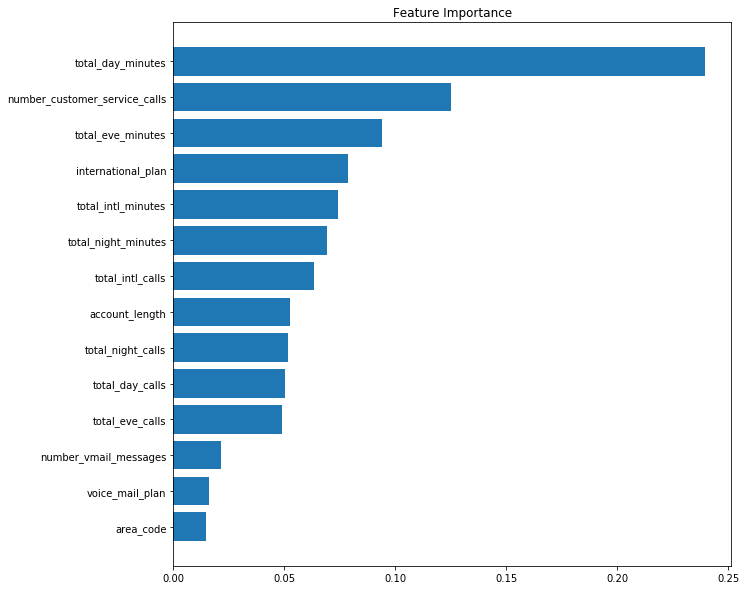

In [44]:
#Calculating feature importances
importances = final_Model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [train.columns[i] for i in indices]

# Creating plot
fig = plt.figure(figsize=(10,10))
plt.title("Feature Importance")

# Add horizontal bars
plt.barh(range(X.shape[1]),importances[indices],align = 'center')
plt.yticks(range(X.shape[1]), names)
plt.show()
#fig.savefig('feature_importance.png')

#### AUC & ROC Curve

ROC AUC: 0.90


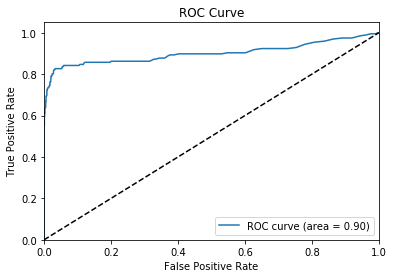

In [45]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, final_Model.predict_proba(X_test)[:,1])
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### roc_auc_score = 0.90 

### Final Test Data Predictions

In [46]:
#Test Data Splitting parts target and Predictors
XX = test.iloc[:,:14].values  #predictors
yy = test.iloc[:,14].values   #target
yy=yy.astype('int')

In [47]:
#Predicting test data 

Churn_Pred = final_Model.predict(XX)
cm = pd.crosstab(yy,Churn_Pred)
TN = cm.iloc[0,0]
FN = cm.iloc[1,0]
TP = cm.iloc[1,1]
FP = cm.iloc[0,1]
print("CONFUSION MATRIX ----->> ")
print(cm)
print()
##check accuracy of model
print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))

CONFUSION MATRIX ----->> 
col_0    0    1
row_0          
-1      66   71
 0     200  242
 1      63   87
 2       4   11
 3       4    2

Accuracy :-  53.2
False Negative Rate :-  45.25
False Postive Rate :-  51.82


#### Saving the OutPut

In [54]:
test_original = pd.read_csv("test.csv")
#output
test_original['Churn_Prediction'] = Churn_Pred
test_original['Churn_Prediction'] = test_original['Churn_Prediction'].map({1 : 'True', 0 : 'False'})

#Predicted _Output
prob_output = pd.DataFrame(data=final_Model.predict_proba(XX),columns=("False_Probability","True_Probability"))
prob_output.head()

output = test_original[['state','area_code','international_plan','voice_mail_plan','Churn_Prediction']]

In [55]:
#Saving Result with Class
output.to_csv('ChurnResult_Test.csv',index = False, encoding='utf-8')
#Saving with Class and Probabilities
output.join(prob_output).to_csv('ChurnResult_Prob_Output.csv', index = False, encoding='utf-8')

In [56]:
df = pd.read_csv("ChurnResult_Test.csv")
df.head()

,state,area_code,international_plan,voice_mail_plan,Churn_Prediction
0,KS,area_code_415,no,yes,False
1,AL,area_code_510,yes,no,True
2,IA,area_code_415,no,no,False
3,VT,area_code_510,no,no,True
4,NE,area_code_415,no,no,True


In [57]:
df2 = pd.read_csv("ChurnResult_Prob_Output.csv")
df2.head()

,state,area_code,international_plan,voice_mail_plan,Churn_Prediction,False_Probability,True_Probability
0,KS,area_code_415,no,yes,False,0.778,0.222
1,AL,area_code_510,yes,no,True,0.240,0.760
2,IA,area_code_415,no,no,False,0.760,0.240
3,VT,area_code_510,no,no,True,0.192,0.808
4,NE,area_code_415,no,no,True,0.382,0.618


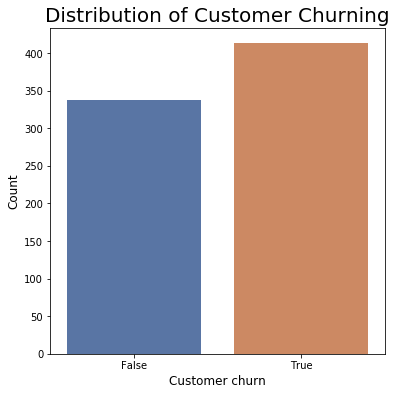

In [63]:
#Target Variable data distribution
plt.figure(figsize=(6,6))
sns.countplot(x = df.Churn_Prediction,palette='deep')
plt.xlabel('Customer churn', fontsize= 12)
plt.ylabel('Count', fontsize= 12)
plt.title("Distribution of Customer Churning",fontsize= 20)
plt.savefig("Distribution of Customer Churning on test data.png")
plt.show()